In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio

In [3]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def f(x):    
    return x.pow(3) + 2*x.pow(2) + 3*x + 1

In [5]:
import math

In [32]:
def f_high_new(data):
    dims = data.shape[1]
    vec = torch.rand(dims).unsqueeze(1)
    val = torch.mm(data,vec)
    val = torch.sign(val)
    return val

In [33]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.hidden2 = torch.nn.Linear(n_hidden,20)
        self.predict = torch.nn.Linear(20, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = F.relu(self.hidden2(x))
        x = self.predict(x)             # linear output
        return x


In [34]:
NUM_SAMPLES = 1000
NUM_SAMPLES_TEST = 1000
NUM_DIMENSIONS = 50

In [35]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio

# reproducible
torch.manual_seed(1) 

### Get training data
r1 = -5
r2 = 5
X_train = (r1 - r2) * torch.rand(NUM_SAMPLES, NUM_DIMENSIONS) + r2

### Compute ground truth value
y = f_high_new(X_train)

net = Net(n_feature=NUM_DIMENSIONS, n_hidden=10, n_output=1)     # define the network
# print(net)  # net architecture
optimizer = torch.optim.SGD(net.parameters(), lr=0.0002)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

In [36]:
# train the network
losses = []
for t in tqdm(range(100000)):
    prediction = net(X_train)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)
#     loss = loss
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    losses.append(loss.item())

  0%|          | 0/100000 [00:00<?, ?it/s]

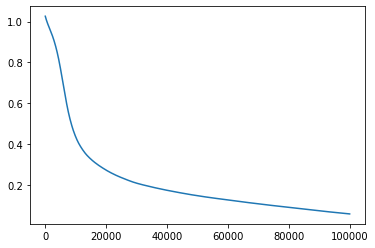

In [37]:
plt.plot(losses)

In [38]:
losses[0]

1.025778889656067

In [39]:
losses[-1]

0.05773305520415306

# Adversarial attack

In [40]:
# FGSM attack code
def fgsm_attack(image, epsilon, data_grad):
    # Collect the element-wise sign of the data gradient
    sign_data_grad = data_grad.sign()
    # Create the perturbed image by adjusting each pixel of the input image
    perturbed_image = image + epsilon*sign_data_grad
    # Return the perturbed image
    return perturbed_image

In [41]:
epsilon = 0.01

In [42]:
r1t = -4
r2t = 4
data_test = (r1t - r2t) * torch.rand(NUM_SAMPLES_TEST, NUM_DIMENSIONS) + r2t

In [43]:
net.eval()

Net(
  (hidden): Linear(in_features=50, out_features=10, bias=True)
  (hidden2): Linear(in_features=10, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=1, bias=True)
)

In [44]:
test_predictions = net(data_test)

In [45]:
ground_truths = f_high_new(data_test)

In [46]:
errors = torch.abs(test_predictions - ground_truths)

In [47]:
max_error = torch.max(errors)

In [48]:
# max_error

In [49]:
data_test.requires_grad = True

In [50]:
def attack_net(net, data):
    outputs = net(data)
    y_test = f_high_new(data)
    target = y_test
    loss = F.mse_loss(outputs.squeeze(1), target)
    net.zero_grad()
    loss.backward()

    # Attack
    data_grad = data.grad.data
    perturbed_data = fgsm_attack(data, epsilon, data_grad)
    perturbed_data = perturbed_data.clamp(-4,4)
    perturbed_outs = net(perturbed_data)
    
    return outputs, perturbed_outs, perturbed_data

In [51]:
maxes = []
for i in tqdm(range(10000)):
    data_test = data_test.detach()
    data_test.requires_grad = True
    o, po, data = attack_net(net, data_test)
    y_test = f_high_new(data_test)
    new_error = torch.abs(po - y_test)
#     new_error = po.squeeze(1) - y_test
    
    max_new = torch.max(new_error).item()    
    maxes.append(max_new)
    if max_new > 2*max_error.item():
        print(max_new)
        print('attack successful')
        break
    else:
        pass

  0%|          | 0/10000 [00:00<?, ?it/s]

<ipython-input-50-e03d98e1ccf5>:5: UserWarning: Using a target size (torch.Size([1000, 1])) that is different to the input size (torch.Size([1000])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(outputs.squeeze(1), target)


In [52]:
max_error

tensor(2.2853, grad_fn=<MaxBackward1>)

In [57]:
test_predictions.dtype

torch.float32

In [61]:
torch.set_printoptions(sci_mode=False)

In [69]:
po

tensor([[ 0.7864],
        [-1.0127],
        [-0.6298],
        [-0.8891],
        [ 0.5354],
        [ 1.0020],
        [ 0.7429],
        [-0.5707],
        [-0.8150],
        [ 0.0410],
        [-1.0067],
        [-1.0164],
        [-1.0384],
        [-0.4566],
        [-0.1356],
        [-0.9644],
        [ 0.2650],
        [ 0.6163],
        [ 0.9404],
        [ 1.3839],
        [-0.9942],
        [ 0.8394],
        [-0.7685],
        [-1.1411],
        [ 0.7314],
        [-0.2822],
        [-0.9359],
        [ 0.5331],
        [-1.0355],
        [ 0.9958],
        [ 0.7473],
        [-0.8796],
        [-0.9670],
        [ 0.6360],
        [ 0.8966],
        [-1.1739],
        [-1.1522],
        [-0.8531],
        [ 0.3761],
        [-0.7707],
        [-0.3612],
        [-1.1247],
        [-0.7191],
        [ 0.9043],
        [-0.4109],
        [ 0.7341],
        [-1.0136],
        [-0.4721],
        [ 0.6552],
        [ 0.3189],
        [-0.9542],
        [-0.9064],
        [-0.

In [70]:
test_predictions

tensor([[     0.7533],
        [    -1.0075],
        [    -0.5970],
        [    -0.8789],
        [     0.4982],
        [     0.9937],
        [     0.7249],
        [    -0.5458],
        [    -0.8104],
        [    -0.0110],
        [    -0.9873],
        [    -1.0112],
        [    -1.0345],
        [    -0.4003],
        [    -0.0879],
        [    -0.9559],
        [     0.2219],
        [     0.5805],
        [     0.9321],
        [     1.3747],
        [    -0.9887],
        [     0.8281],
        [    -0.7352],
        [    -1.1360],
        [     0.7228],
        [    -0.2551],
        [    -0.9338],
        [     0.4970],
        [    -1.0187],
        [     0.9871],
        [     0.7252],
        [    -0.8589],
        [    -0.9628],
        [     0.6296],
        [     0.8870],
        [    -1.1690],
        [    -1.1490],
        [    -0.8467],
        [     0.3436],
        [    -0.7668],
        [    -0.3012],
        [    -1.1198],
        [    -0.6748],
        [  